# Graph Traversal
Code adapted from [here](https://amunategui.github.io/reinforcement-learning/index.html). 

In [20]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas

In [21]:
def print_graph(set_points):
    H = nx.Graph()
    H.add_edges_from(set_points)

    # Defines layout to not have crossing edges. Its for visual aesthetic pleasure 
    pos = nx.spring_layout(H)

    nx.draw_networkx_nodes(H,pos)
    nx.draw_networkx_edges(H,pos)
    nx.draw_networkx_labels(H,pos)

    plt.axis('off')
    plt.show()

8


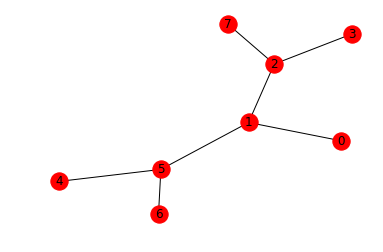

In [22]:
# Generate more complicated graph by setting amount of nodes and edges

new_points = set()
num_nodes = 10
num_edges = 30
#np.random.seed(0)

goal = 7

for x in range(0,num_edges):
    temp_1 = np.random.randint(num_nodes)
    temp_2 = np.random.randint(num_nodes)
    if temp_1 != temp_2:
        new_points.add((temp_1,temp_2))

new_points = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
num_nodes = len(new_points)+1  # for the pesky zero
print(num_nodes)

print_graph(new_points)
points_list = new_points

In [23]:
# Create matrix to represent graph

Matrix_size = num_nodes
R = np.matrix(np.ones(shape=(Matrix_size, Matrix_size)))
R *= -1

In [24]:
# assign zeros to paths and 100 to goal point
for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of points
        R[point[::-1]]= 0

# (7,7) is a 100 goal state but its linked to itself (its a self loop)
R[goal,goal]= 100

In [25]:
def changes(value):
    if value != -1:
        color = 'blue' 
    else:
        color = 'black'
    return 'color: %s' % color

table = pandas.DataFrame(R,dtype=int)
table.style.applymap(changes)

,0,1,2,3,4,5,6,7
0,-1,0,-1,-1,-1,-1,-1,-1
1,0,-1,0,-1,-1,0,-1,-1
2,-1,0,-1,0,-1,-1,-1,100
3,-1,-1,0,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,0,-1,-1
5,-1,0,-1,-1,0,-1,0,-1
6,-1,-1,-1,-1,-1,0,-1,-1
7,-1,-1,0,-1,-1,-1,-1,100


In [26]:
Q = np.matrix(np.zeros([Matrix_size,Matrix_size]))
gamma = 0.8 # decay rate
initial_state = 1

In [27]:
# Takes available state actions and returns possible actions
def available_actions(state):
    current_state_row = R[state,:]
    av_act = np.where(current_state_row >= 0)[1] # [1] because splits into 2 arrays, one each for true/false 
    return av_act

# Chooses random action based on available actions
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1)) #returns a one value array, convert to single value
    return next_action

# Updates the reward matrix based on largest rewarded actions?
def update(current_state, action, gamma):
    max_index = np.where(Q[action,:] == np.max(Q[action,:]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value

  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

In [28]:
available_act = available_actions(initial_state) 
action = sample_next_action(available_act)
update(initial_state, action, gamma)

0

# Training

In [29]:
# Samples a different random state on each iteration 
# Converges to an average score of ~982.xx for the default 7 node graph

scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)

print("Trained Q matrix:")
np.round(pandas.DataFrame(Q/np.max(Q)*100,dtype=float), decimals=2)

Trained Q matrix:


,0,1,2,3,4,5,6,7
0,0.0,64.0,0.0,0.0,0.00,0.0,0.00,0.0
1,51.2,0.0,80.0,0.0,0.00,51.2,0.00,0.0
2,0.0,64.0,0.0,64.0,0.00,0.0,0.00,100.0
3,0.0,0.0,80.0,0.0,0.00,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.00,51.2,0.00,0.0
5,0.0,64.0,0.0,0.0,40.96,0.0,40.96,0.0
6,0.0,0.0,0.0,0.0,0.00,51.2,0.00,0.0
7,0.0,0.0,80.0,0.0,0.00,0.0,0.00,100.0


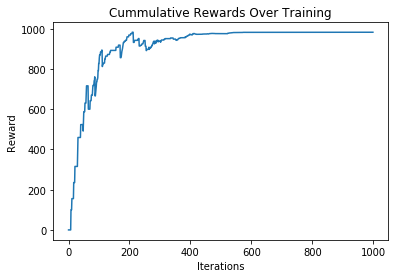

In [30]:
plt.plot(scores)
plt.title("Cummulative Rewards Over Training")
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.show()

# Testing

In [31]:
# Uses Q matrix to decide path by picking actions based on amount of reward

current_state = 0
steps = [current_state]

while current_state != 7:
    
    next_step_index = np.where(Q[current_state,:] == np.max(Q[current_state,:]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


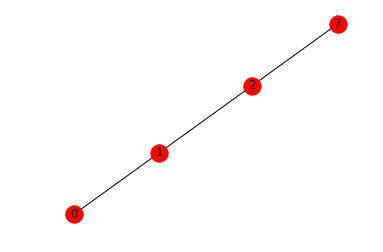

In [32]:
path_points = list()

for x in range(0,len(steps)-1):
    point = (steps[x],steps[x+1])
    path_points.append(point)

print_graph(path_points)